<a href="https://colab.research.google.com/github/swethag04/ml-projects/blob/main/used-car-price-analysis/used-car-price-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](/content/sample_data/kurt.jpeg)

### Overview ###

The objective of this analysis is to understand what factors make a car more or less expensive and provide clear recommendations to a used car dealership as to what consumers value in a used car.

The vehicle dataset used is from Kaggle and contains information on 426K used cars.

The analysis uses CRISP-DM methodology which consists of the following steps:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment




### Business Understanding

This analysis will focus on understanding what are some of the features that a customer values in a used car, that will influence the price of the car.

1. Do customers value model/manufacturer/size of a used car?
2. Do customers value age/condition of a used car?
3. Do customers value the mechanical features like cylinders, tranmsission, fuel type etc. of a used car?

These insights will help the car dealership to build their future inventory as well maximise their revenue/profit.


### Data Understanding

The data understanding step involves getting familiar with the dataset, data exploration and identifying any quality issues within.

In [111]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
%matplotlib inline

In [112]:
df = pd.read_csv('/content/sample_data/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [45]:
df.shape

(426880, 18)

The dataset has 426K rows,  17 input features and one target feature ("Price")

In [46]:
# Exploring the data types of the different features
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

**Features in the dataset and their description**

1. **id** : A unique identifier for a car sold
2. **region** : Name of the region where the car was sold
3. **price** : sale price of car
4. **year** : Year of car manufacture
5. **manufacturer** : Car manufacturer
6. **model** : Car model
7. **condition** : Current condition of car (good, excellent, like new, fair, new, salvage and NaN)
8. **cylinders** : Number of cylinders in the car ( 6 cylinders, 4 cylinders, 8 cylinders, 5 cylinders, 10 cylinders, other, 3 cylinders, 12 cylinders)
9. **fuel** : Fuel type (gas, other, diesel, hybrid, electric)
10. **odometer**: odometer reading
11. **title_status** : status of title of car (clean, rebuilt, salvage, lien, missing, parts only)
12. **transmission** : Type of transmission (automtaic, manual, other)
13. **VIN** : VIN of car
14. **drive** : Drive type of car (4wd, fwd, rwd)
15. **size** : car size (full-size, mid-size, compact, sub-compact)
16. **type** : Type of car (sedan, SUV, pickup, truck, other, coupe, htachback, wagon, van, convertible, mini-van, offroad, bus)
17. **paint_color** : paint color of car (white, black, silver, blue, red, grey, green, custom, yellow, orange, purple)
18. **state**: state where car is sold

`id` and `price` are of `int` data type <br>
`year` and `odometer` are of `float` data type <br>
All other remaining attributes are of `object` data type



**Exploring the individual features**

In [47]:
# unique values in each feature
df.nunique(axis=0)

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [48]:
# % of null values in each column
(df.isnull().sum()/df.shape[0])* 100.0

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

**Year**

*   Most cars are manufactured between the years 2000 and 2022

<Axes: xlabel='year', ylabel='Density'>

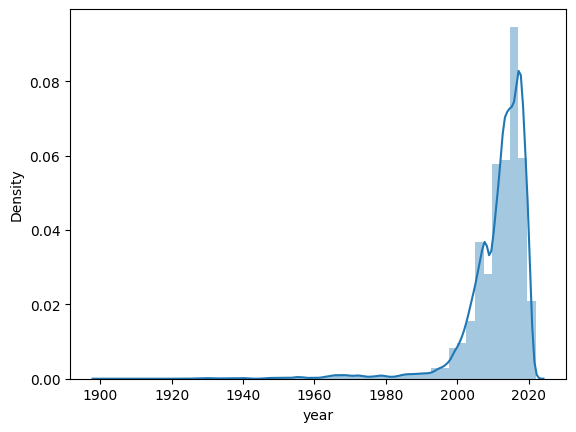

In [49]:
sns.distplot(df.year)

#### **Manufacturer**
*   There are 42 unique manufcturers
*   Top 5 manufacturers are Ford, Chevrolet, Toyota, Honda and Jeep
*   Manufacturer has 4% missing values


In [50]:
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

<Axes: >

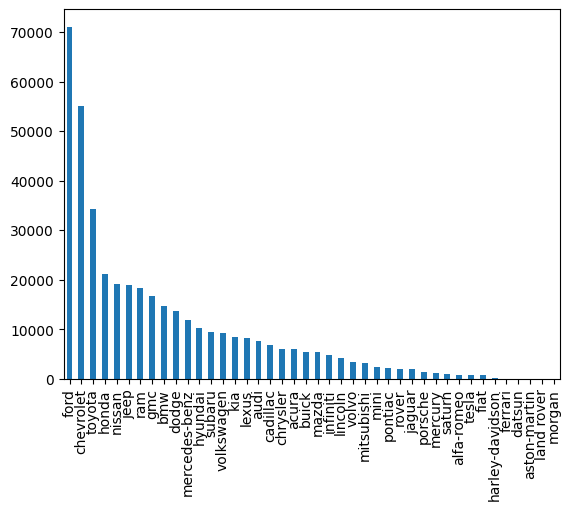

In [51]:
df['manufacturer'].value_counts().plot(kind='bar')

**Model**

*   There are 29,649 unique car models in the dataset
*  Model has 1% missing values

In [52]:
df['model'].unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

**Condition**

*   Condition has 6 distinct categories
*   48% of the cars were 'good' condition and 40% 'excellent' condition
*   Condition has 41% values missing



In [53]:
((df['condition'].value_counts()/df['condition'].count())* 100.0)

good         48.048865
excellent    40.141074
like new      8.378169
fair          2.677865
new           0.516267
salvage       0.237760
Name: condition, dtype: float64

**Cylinders**

*   cylinders has 8 distinct categories
*   96% of the cars has 6, 4 or 8 cylinders. 6 cylinders was the most common (~38%) followed by 4 and 8 cylinders
* cylinders has 42% missing values


In [54]:
((df['cylinders'].value_counts()/df['cylinders'].count())* 100.0)

6 cylinders     37.788220
4 cylinders     31.156251
8 cylinders     28.917103
5 cylinders      0.686993
10 cylinders     0.583864
other            0.520863
3 cylinders      0.262839
12 cylinders     0.083868
Name: cylinders, dtype: float64

**Fuel**

*   Fuel has 5 distinct categories
*   84% of the cars were 'gas' fuel, followed by diesel/other.
*  Fuel has a small % (0.7%) of missing values


In [55]:
((df['fuel'].value_counts()/df['fuel'].count())* 100.0)

gas         84.037918
other        7.249444
diesel       7.092319
hybrid       1.219722
electric     0.400597
Name: fuel, dtype: float64

**Drive**

*   Drive has 3 distinct categories
*   44% of the has had 4wd, followerd by 35% fwd
*  Drive has 31% of missing values

In [56]:
((df['drive'].value_counts()/df['drive'].count())* 100.0)

4wd    44.51509
fwd    35.60998
rwd    19.87493
Name: drive, dtype: float64

**Size**

*   Size has 4 distinct categories
*   53% of the car were 'full-size' followed by 28% mid-size and 16% compact
* Size has 71% missing values

In [57]:
((df['size'].value_counts()/df['size'].count())* 100.0)

full-size      52.659747
mid-size       28.606278
compact        16.083771
sub-compact     2.650205
Name: size, dtype: float64

**Type**

*   Type has 13 distinct categories
*   Sedan was the most commom car type (26%) followed by SUV (23%) and pickup (13%)
* Type has 22% missing values


In [58]:
((df['type'].value_counts()/df['type'].count())* 100.0)

sedan          26.062954
SUV            23.137398
pickup         13.026088
truck          10.561879
other           6.619324
coupe           5.749322
hatchback       4.969134
wagon           3.218650
van             2.559113
convertible     2.314518
mini-van        1.444516
offroad         0.182323
bus             0.154780
Name: type, dtype: float64

**Paint Color**

*   Paint color has 13 distinct categories
*   White was the most commom colot (26%) followed by black (21%) and silver (43%)
* Paint color has 31% missing values

In [59]:
((df['paint_color'].value_counts()/df['paint_color'].count())* 100.0)

white     26.724350
black     21.188363
silver    14.483765
blue      10.524240
red       10.271440
grey       8.229826
green      2.475082
custom     2.258348
brown      2.222282
yellow     0.721997
orange     0.668741
purple     0.231565
Name: paint_color, dtype: float64

**odometer**

* The distribution of odometer is right skewed with mean as 98043 and median 85548
* odometer has 1% missing values

<Axes: title={'center': 'Car odometer Distribution Plot'}, xlabel='odometer', ylabel='Density'>

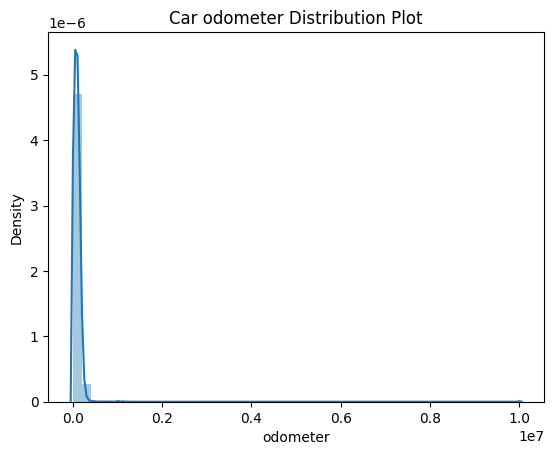

In [60]:
plt.title('Car odometer Distribution Plot')
sns.distplot(df.odometer)

In [61]:
df.odometer.describe()

count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64

**Price**

*   Price is the target variable that needs to be predicted
*   Price has no missing values
* The distribution of price is righ skewed with mean as 75199 and median 13950

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

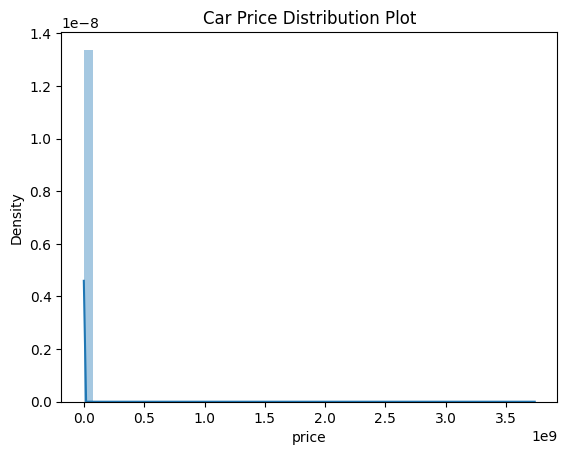

In [62]:
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

In [63]:
df.price.describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [64]:
df['state'].unique()

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi',
       'al', 'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo',
       'mt', 'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc',
       'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

### Data Preparation

The next step in CRISP-DM process is data preparation. This includes engineering of new features, handling data integrity issues and cleaning, data transformations and preparing the data for modeling.  

**Fixing missing data**




In [65]:
# id, VIN, region, state columns can be dropped as they are not useful predictors
# size can be dropped as it has 71% missing values
df.drop(columns= ['id', 'VIN', 'region', 'size', 'state'], inplace=True)

In [66]:
# Dropping rows that have < 5% missing values in columns
df.dropna(subset = ['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission'], inplace=True)

In [67]:
# filling the missing values for these columns as 'other'
df[['condition', 'cylinders', 'drive', 'type', 'paint_color']] = df[['condition', 'cylinders', 'drive', 'type', 'paint_color']].fillna('other')
(df.isnull().sum()/df.shape[0])* 100.0

price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
dtype: float64

In [68]:
df.shape

(389604, 13)

After removing some of the missing data and filling in for missing values for some columns, the dataset now has 389K rows and 15 columns

**Adding a new feature**

In [69]:
#Creating a new feature age to calculate the age of the car and dropping year column
df['age'] = date.today().year - df['year']
df.drop(['year'], axis=1, inplace=True)

**Fixing for outliers**

In [70]:
# Removing the 99th percentile outliers in price to view the distribution better
df = df[df['price'] <= df['price'].quantile(0.99)]

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

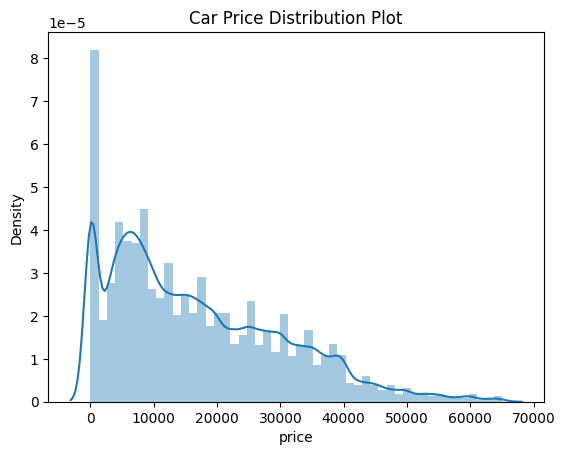

In [71]:
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

In [72]:
df['price'].describe()

count    385786.000000
mean      16891.533773
std       13591.209308
min           0.000000
25%        5995.000000
50%       13988.000000
75%       25991.000000
max       64999.000000
Name: price, dtype: float64

**Price**

After removing the outliers in price, the distribution is more comprehensible

* Mean price of car sold is USD 16,891 and median price sold is USD 13,988   
* The distribution of prices is right skewed, with mean greater than the median.
* 50% of cars have a price below USD 14,000 while the other half has a price between USD 14,000 - 65,000

In [73]:
df.dtypes

price             int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
age             float64
dtype: object

**Comparing Price with the input features**

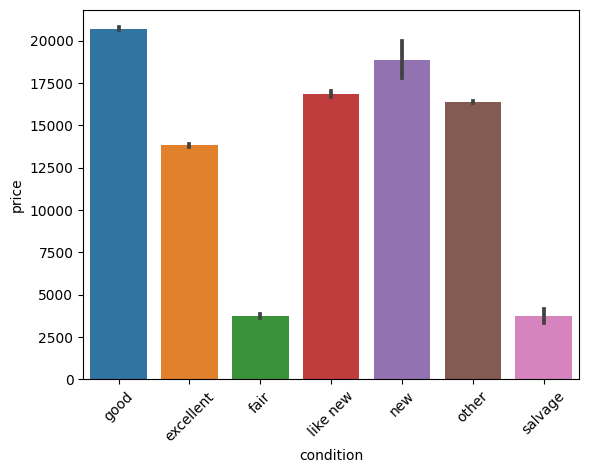

In [74]:
# Price vs Manufacturer
sns.barplot(x= 'condition', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

"Good" condition cars have the highest average price and salvage/fair conditionc ars have lower prices

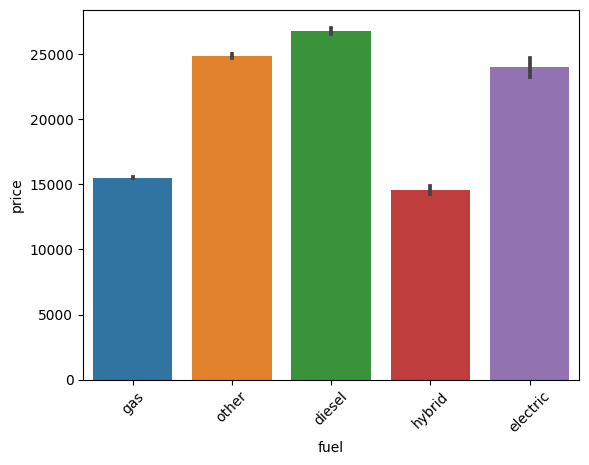

In [75]:
# Price vs Fuel
sns.barplot(x= 'fuel', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

Hybrid cars cost the lowest while diesel cars cost the highest. Electric cars cost more than gas.

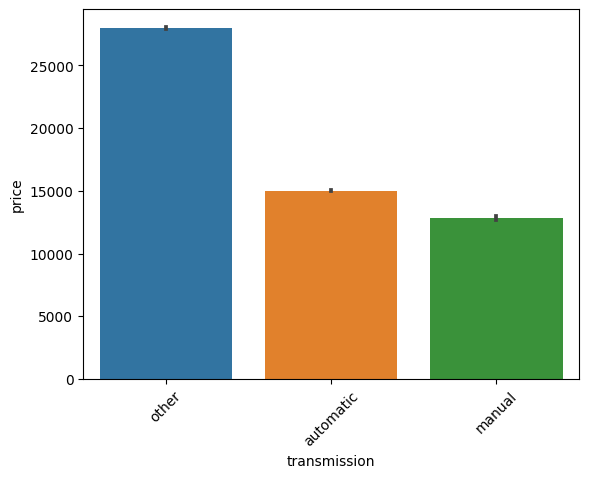

In [76]:
sns.barplot(x= 'transmission', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

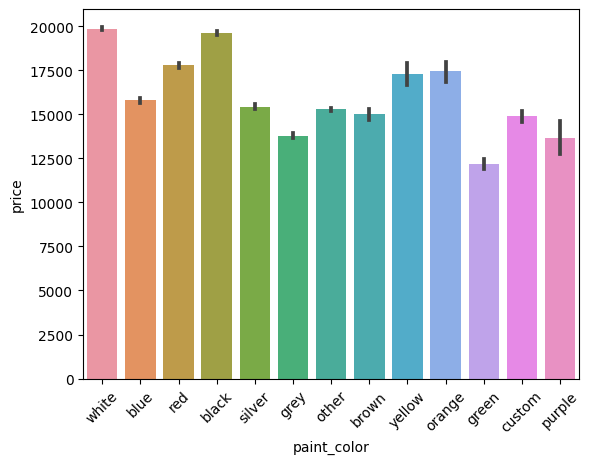

In [77]:
sns.barplot(x= 'paint_color', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

Manual tranmission cars have lower prices than automatic and other transmisson types.

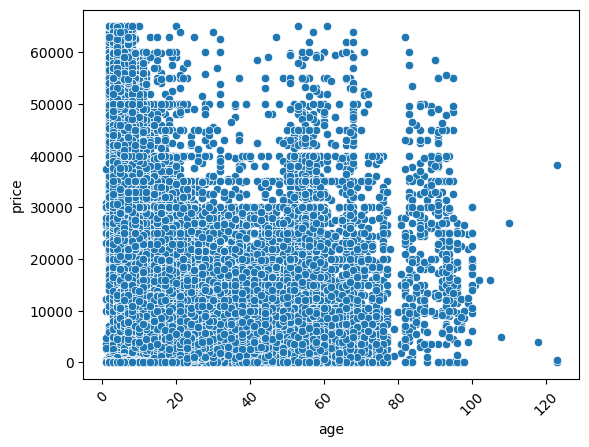

In [78]:
sns.scatterplot(x= 'age', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

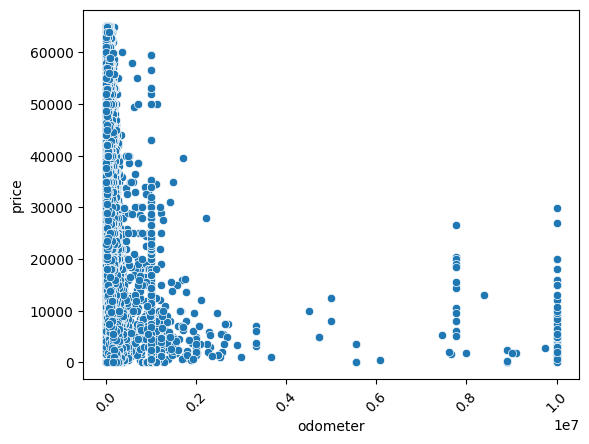

In [79]:
sns.scatterplot(x= 'odometer', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

**Encoding the categorical variables**

In [80]:
numeric_features = ['age', 'odometer' ]
categorical_features = ['model', 'manufacturer', 'paint_color', 'condition','cylinders', 'fuel', 'title_status', 'transmission'
                         ,'drive' ,'type']
label_encoder = preprocessing.LabelEncoder()
df[categorical_features] = df[categorical_features].apply(label_encoder.fit_transform)

In [81]:
df.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
27,33590,14,16876,2,6,2,57923.0,0,2,2,8,11,9.0
28,22590,7,17238,2,6,2,71229.0,0,2,2,8,1,13.0
29,39590,7,17263,2,6,2,19160.0,0,2,2,8,9,3.0
30,30990,38,19918,2,6,2,41124.0,0,2,2,8,9,6.0
31,15000,13,8603,0,5,2,128000.0,0,0,3,10,0,10.0


In [88]:
# Normalizing numeric columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
27,33590,14,16876,2,6,2,-0.203401,0,2,2,8,11,-0.282955
28,22590,7,17238,2,6,2,-0.134169,0,2,2,8,1,0.183355
29,39590,7,17263,2,6,2,-0.405089,0,2,2,8,9,-0.982419
30,30990,38,19918,2,6,2,-0.290808,0,2,2,8,9,-0.632687
31,15000,13,8603,0,5,2,0.161216,0,0,3,10,0,-0.166377


In [83]:
df_ohe = pd.get_dummies(df, columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission',
                                       'drive', 'type', 'paint_color'])
df_ohe.head(5)

,price,model,odometer,age,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,...,paint_color_3,paint_color_4,paint_color_5,paint_color_6,paint_color_7,paint_color_8,paint_color_9,paint_color_10,paint_color_11,paint_color_12
27,33590,16876,57923.0,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28,22590,17238,71229.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,39590,17263,19160.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30,30990,19918,41124.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31,15000,8603,128000.0,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_ohe.shape

(385786, 104)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [90]:
X = df.drop('price', axis=1)
y = df['price']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [100]:
# Linear regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
train_preds = model1.predict(X_train)
test_preds = model1.predict(X_test)
train_mse = mean_squared_error(train_preds, y_train)
test_mse = mean_squared_error(test_preds, y_test)
print("Train MSE: ", train_mse )
print("Test MSE: ", test_mse)

Train MSE:  140553771.27786902
Test MSE:  139058038.292477


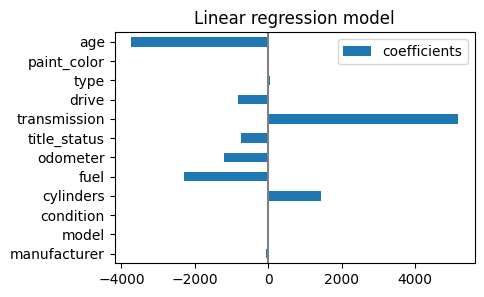

In [102]:
linear_coefs = pd.DataFrame(model1.coef_, columns= ['coefficients'], index=X_train.columns)
linear_coefs.plot(kind='barh', figsize=(6,3))
plt.title("Linear regression model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [97]:
# Ridge regression
ridge_pipe = Pipeline([('scaler', scaler),
                        ('ridge', Ridge())])
ridge_pipe.fit(X_train, y_train)
train_preds_ridge = ridge_pipe.predict(X_train)
test_preds_ridge = ridge_pipe.predict(X_test)
train_mse_ridge = mean_squared_error(train_preds_ridge, y_train)
test_mse_ridge = mean_squared_error(test_preds_ridge, y_test)
print("Ridge Train MSE: ", train_mse_ridge )
print("Ridge Test MSE: ", test_mse_ridge)

Ridge Train MSE:  140553771.27839422
Ridge Test MSE:  139058041.37323123


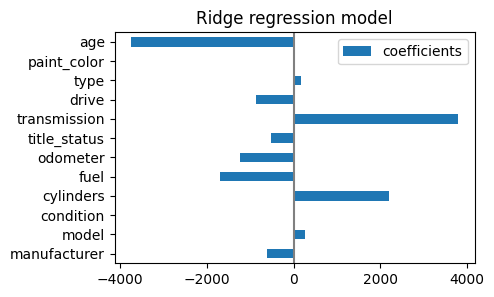

In [104]:
ridge_coefs = pd.DataFrame(ridge_pipe[1].coef_, columns= ['coefficients'], index=X_train.columns)
ridge_coefs.plot(kind='barh', figsize=(6,3))
plt.title("Ridge regression model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [109]:
# Using Feature selection
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
param_dict = {'selector__n_features_to_select': [2,3,4,5]}
selector_grid = GridSearchCV(selector_pipe, param_dict)
selector_grid.fit(X_train, y_train)
selector_train_mse = mean_squared_error(selector_grid.predict(X_train), y_train)
selector_test_mse = mean_squared_error(selector_grid.predict(X_test), y_test)

# ANSWER CHECK
print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')

Train MSE: 141897683.32445776
Test MSE: 140485274.48095316


In [110]:
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

# Answer check
print(best_estimator, best_selector, best_model)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('model', LinearRegression())]) SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5) LinearRegression()
Features from best selector: Index(['cylinders', 'fuel', 'odometer', 'transmission', 'age'], dtype='object').
Coefficient values: 


,cylinders,fuel,odometer,transmission,age
model,1458.639224,-2349.304395,-1182.612004,5040.216186,-3889.61155


### Evaluation

All the 3 models have similar test mse metrics. A simple linear regression model using all the features is a good choice of model to use to predict the price of used car.

### Deployment

The linear regression model can be deployed to production to predict the price of cars. Based on the analysis, following are the key features that influence the price of the car.

1. Age
2. Odometer
3. Fuel
4. Cylinder
5. Transmission


### Next Steps
1. Due to time constraint, I did not get a chance to explore other models like Polynomical regression, Random forest regression etc. Some of these alternalte models could be built and evaluated.
2. For missing values, I used imputation with a known label or removing the missing rows completely. Alternate methods for filling in missing values can be explored.
3. Techniques like cross validation, hyper parameter optimization can be explored to improve model performance

